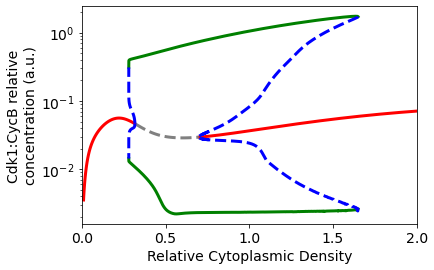

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
cdk1_curve = pd.read_csv('../bifurcation/result_cdk1_bif_diag.dat', header=None, sep=' ')
# Threshold for avoiding continuous line between 
# discontinuous fragments
thrs = 0.52
# Extract each state from the data
sss = cdk1_curve.loc[cdk1_curve[3] == 1]
uss = cdk1_curve.loc[cdk1_curve[3] == 2]
slc = cdk1_curve.loc[cdk1_curve[3] == 3]
ulc = cdk1_curve.loc[cdk1_curve[3] == 4]
"""
# Uncomment to plot in terms of dilution of concentrated
# extract. Note that the threshold needs to be changed
sss.loc[:,0] = 100*(1.0 - sss.loc[:,0]/2.5)
uss.loc[:,0] = 100*(1.0 - uss.loc[:,0]/2.5)
slc.loc[:,0] = 100*(1.0 - slc.loc[:,0]/2.5)
ulc.loc[:,0] = 100*(1.0 - ulc.loc[:,0]/2.5)
"""
# Stable Steady-State
plt.plot(sss.loc[sss[0] < thrs, 0], sss.loc[sss[0] < thrs, 1], 'r-', linewidth=3)
plt.plot(sss.loc[sss[0] > thrs, 0], sss.loc[sss[0] > thrs, 1], 'r-', linewidth=3)
# Unstable Steady-State
uss = uss.drop([0]) # Artifact generated by XPP
plt.plot(uss[0], uss[1], '--', color='gray', linewidth=3)
# Stable Limit Cycle
slc = slc.drop([906, 1749]) # Artifact generated by XPP
plt.plot(slc[0], slc[1], '-', color='green', linewidth=3)
plt.plot(slc[0], slc[2], '-', color='green', linewidth=3)
# Unstable Limit Cycle
plt.plot(ulc.loc[ulc[0] < thrs, 0], ulc.loc[ulc[0] < thrs, 1], 'b--', linewidth=3)
plt.plot(ulc.loc[ulc[0] > thrs, 0], ulc.loc[ulc[0] > thrs, 1], 'b--', linewidth=3)
plt.plot(ulc.loc[ulc[0] < thrs, 0], ulc.loc[ulc[0] < thrs, 2], 'b--', linewidth=3)
plt.plot(ulc.loc[ulc[0] > thrs, 0], ulc.loc[ulc[0] > thrs, 2], 'b--', linewidth=3)
# Plot Parameters
plt.tick_params(labelsize=14)
plt.xlabel('Relative Cytoplasmic Density', fontsize=14)
plt.ylabel('Cdk1:CycB relative\nconcentration (a.u.)', fontsize=14)
plt.xlim([0, 2.0])
plt.yscale('log')
# Save Figure
plt.savefig('./PNGs/Bifurcation_Diagram.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('./SVGs/Bifurcation_Diagram.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()